<a href="https://colab.research.google.com/github/pragati77/wbc-classification/blob/master/wbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
bs = 32 # batch size
sz=224 # image size

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path= '/content/drive/My Drive/WBC/dataset2-master/dataset2-master/images'

data = ImageDataBunch.from_folder(path,train='TRAIN',valid='TEST',size=sz,bs=bs,num_workers=0).normalize(imagenet_stats)

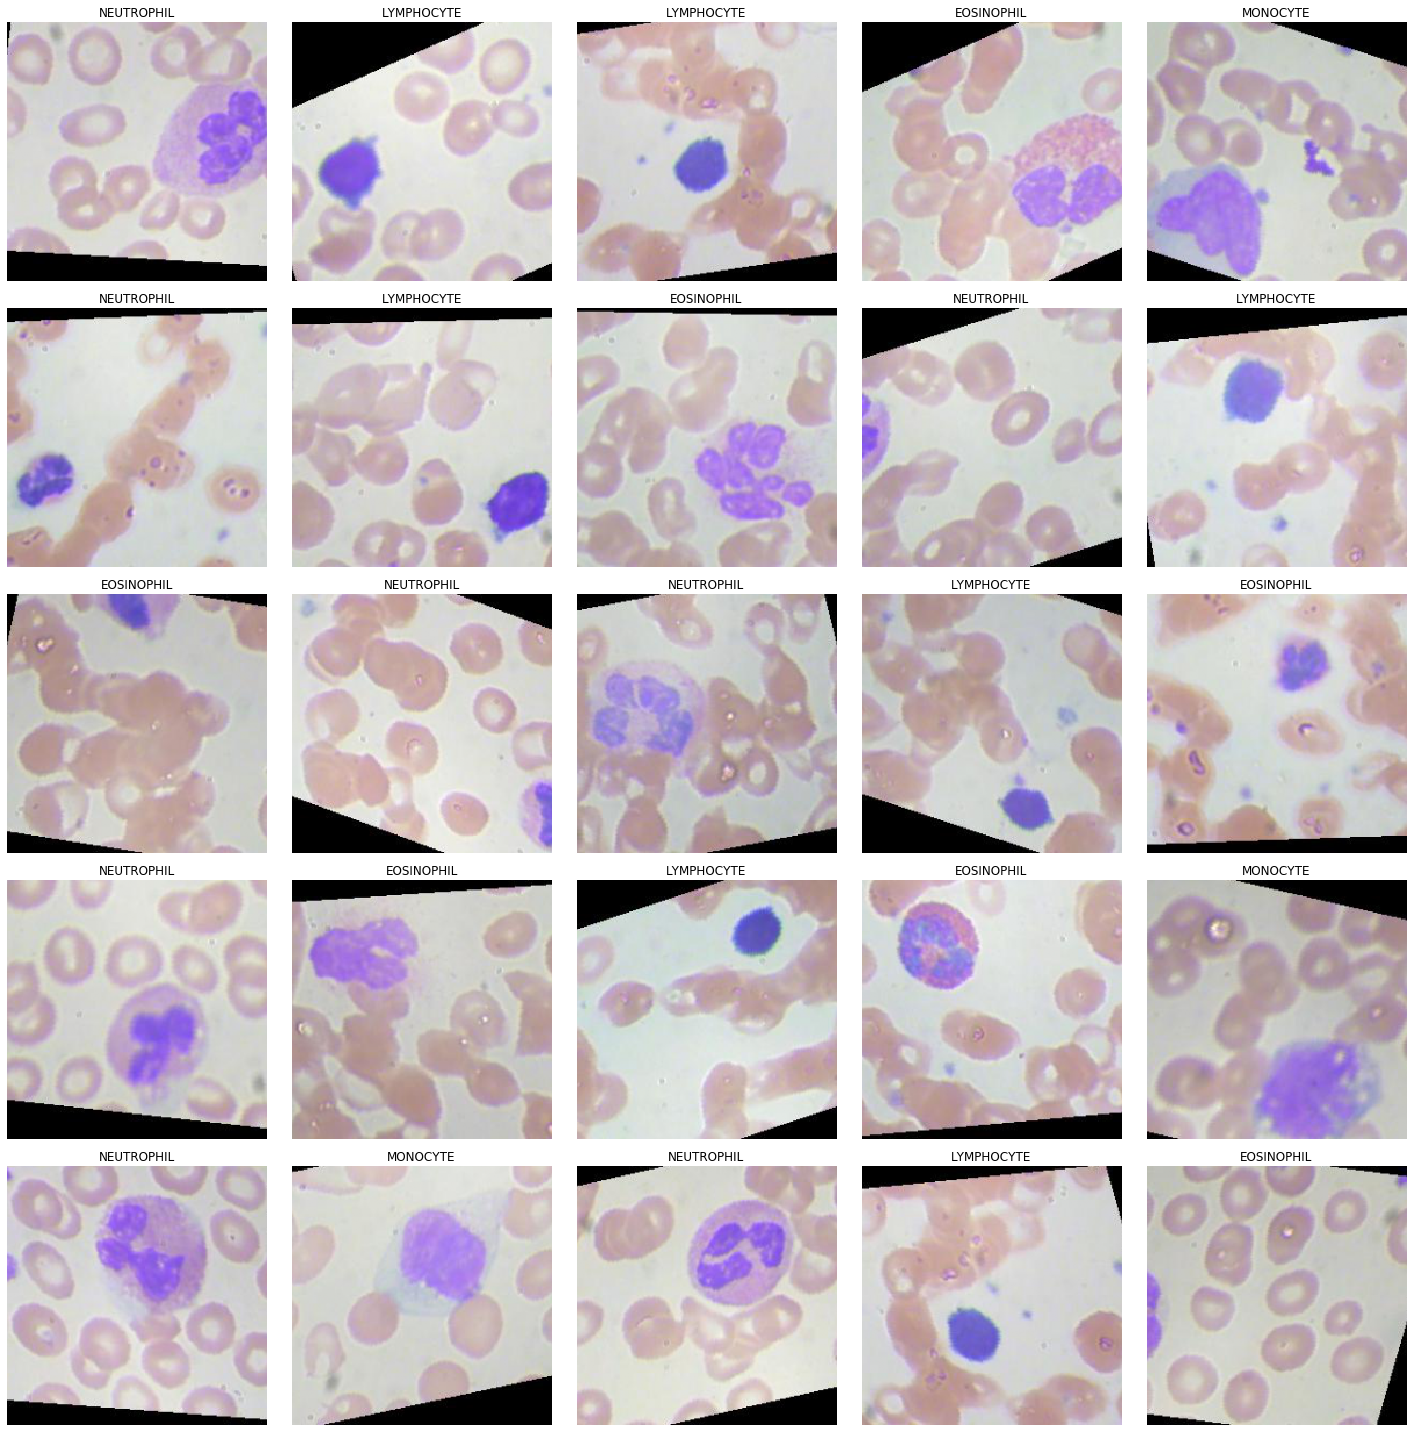

In [0]:
data.show_batch()

In [0]:
print(data.classes)
len(data.classes),data.c

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


(4, 4)

In [0]:
model_path=Path('/content/drive/My Drive/WBC')
learn = cnn_learner(data, models.resnet34, metrics=error_rate,model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 193MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


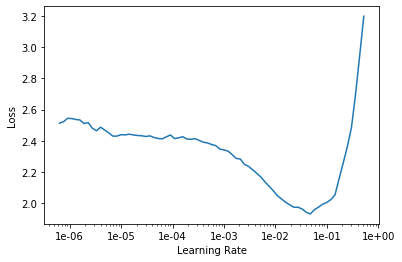

In [0]:
learn.lr_find() #to find the learning rate for the last layer of the model.
learn.recorder.plot() # plotting the graph for Loss vs Learning rate

In [0]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4,max_lr=1e-01) #training the model for 4 epochs. for the 

epoch,train_loss,valid_loss,error_rate,time
0,0.991098,5.408853,0.536389,1:03:05
1,0.684199,1.628982,0.217129,02:16
2,0.279352,0.681057,0.162847,02:15
3,0.107749,0.885341,0.135103,02:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


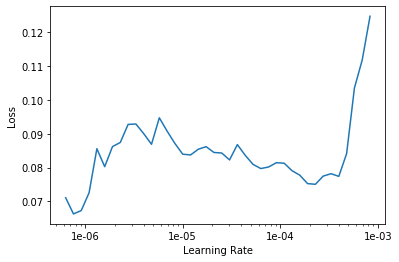

In [0]:
learn.unfreeze() # to enable the changing of the weights according to the dataset we provided.
learn.lr_find()
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.107956,0.683999,0.139928,03:09
1,0.086198,0.700469,0.140330,03:11
2,0.102273,0.623760,0.137113,03:07
3,0.097817,0.676567,0.140330,03:07


In [0]:
learn.save('WBC-stage1')

In [0]:
learn.load('WBC-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (9957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL
Path: /content/drive/My Drive/WBC/dataset2-master/dataset2-master/images;

Valid: LabelList (2487 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL
Path: /content/drive/My Drive/WBC/dataset2-master/dataset2-master/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (con

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

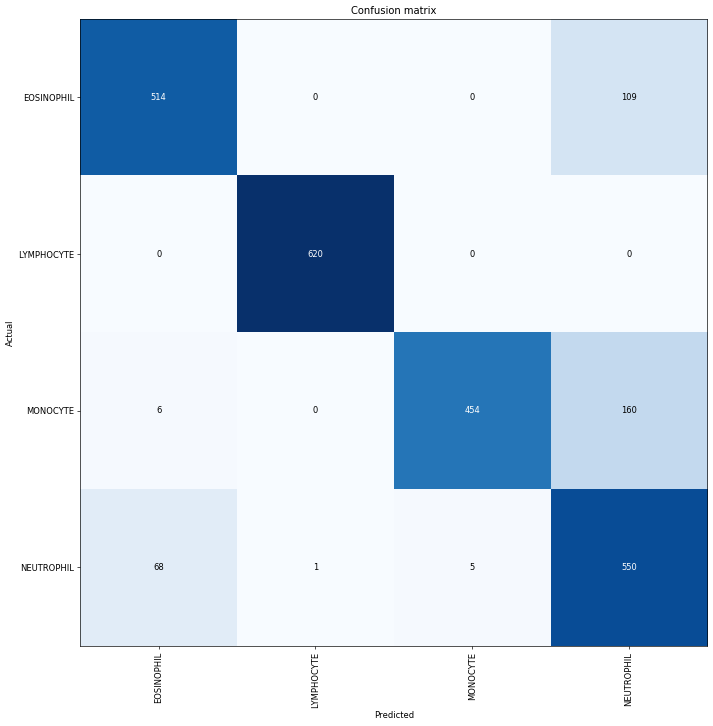

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)